<center>
  <h1>Fetal Health Classification</h1>
  <img src="https://blog.pregistry.com/wp-content/uploads/2018/08/AdobeStock_90496738.jpeg">
  <small>Source: Google</small>
</center>

  <p>
  Fetal mortality refers to stillbirths or fetal death. It encompasses any death of a fetus after 20 weeks of gestation.

  Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality.
  
  Cardiotocography is a technical means of recording the fetal heartbeat and the uterine contractions during pregnancy. It is most commonly used in the third trimester and its purpose is to monitor fetal well-being and allow early detection of fetal distress. An abnormal CTG may indicate the need for further investigations and potential intervention.
  </p>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../Datasets/fetal_health.csv')

| Variable symbol |	Variable description|
| ----------------|---------------------|
|LB	| Fetal heart rate baseline (beats per minute)|
|AC	| Number of accelerations per second|
|FM	| Number of fetal movements per second|
|UC	| Number of uterine contractions per second|
|DL	| Number of light decelerations per second|
|DS	| Number of severe decelerations per second|
|DP	| Number of prolonged decelerations per second|
|ASTV	| Percentage of time with abnormal short-term variability|
|MSTV	| Mean value of short-term variability|
|ALTV	| Percentage of time with abnormal long-term variability|
|MLTV	| Mean value of long-term variability|
|Width	| Width of FHR histogram|
|Min	| Minimum of FHR histogram|
|Max	| Maximum of FHR histogram|
|Nmax	| Number of histogram peaks|
|Nzeros	| Number of histogram zeroes|
|Mode	| Histogram mode|
|Median	| Histogram median|
|Variance	| Histogram variance|
|Tendency |	Histogram tendency|
|NSP	| Fetal state class code (N=Normal, S=Suspected,P=Pathological)|


Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6822315/


In [5]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [7]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [8]:
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

Thankfully, there are no NaN values in the dataset.

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


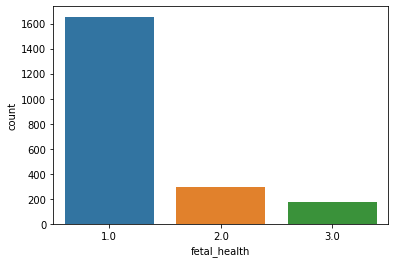

In [9]:
sns.countplot(x='fetal_health', data=df)
print(df['fetal_health'].value_counts())

We can see that there is the problem of class imbalance in this dataset. This means we cannot use **accuracy** as a metric to evaluate the performance of our model. The most appropiate metric for model evaluation can be:
1. F1 Score
2. Recall
3. Precision

Before diving deep into understanding the data and features, let us first look at what does the three different categories of fetal_health represent. Please refer to the table below for the same.

Reference: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4812878/

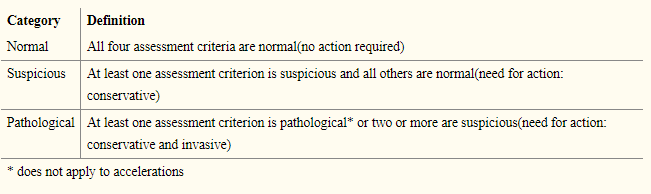

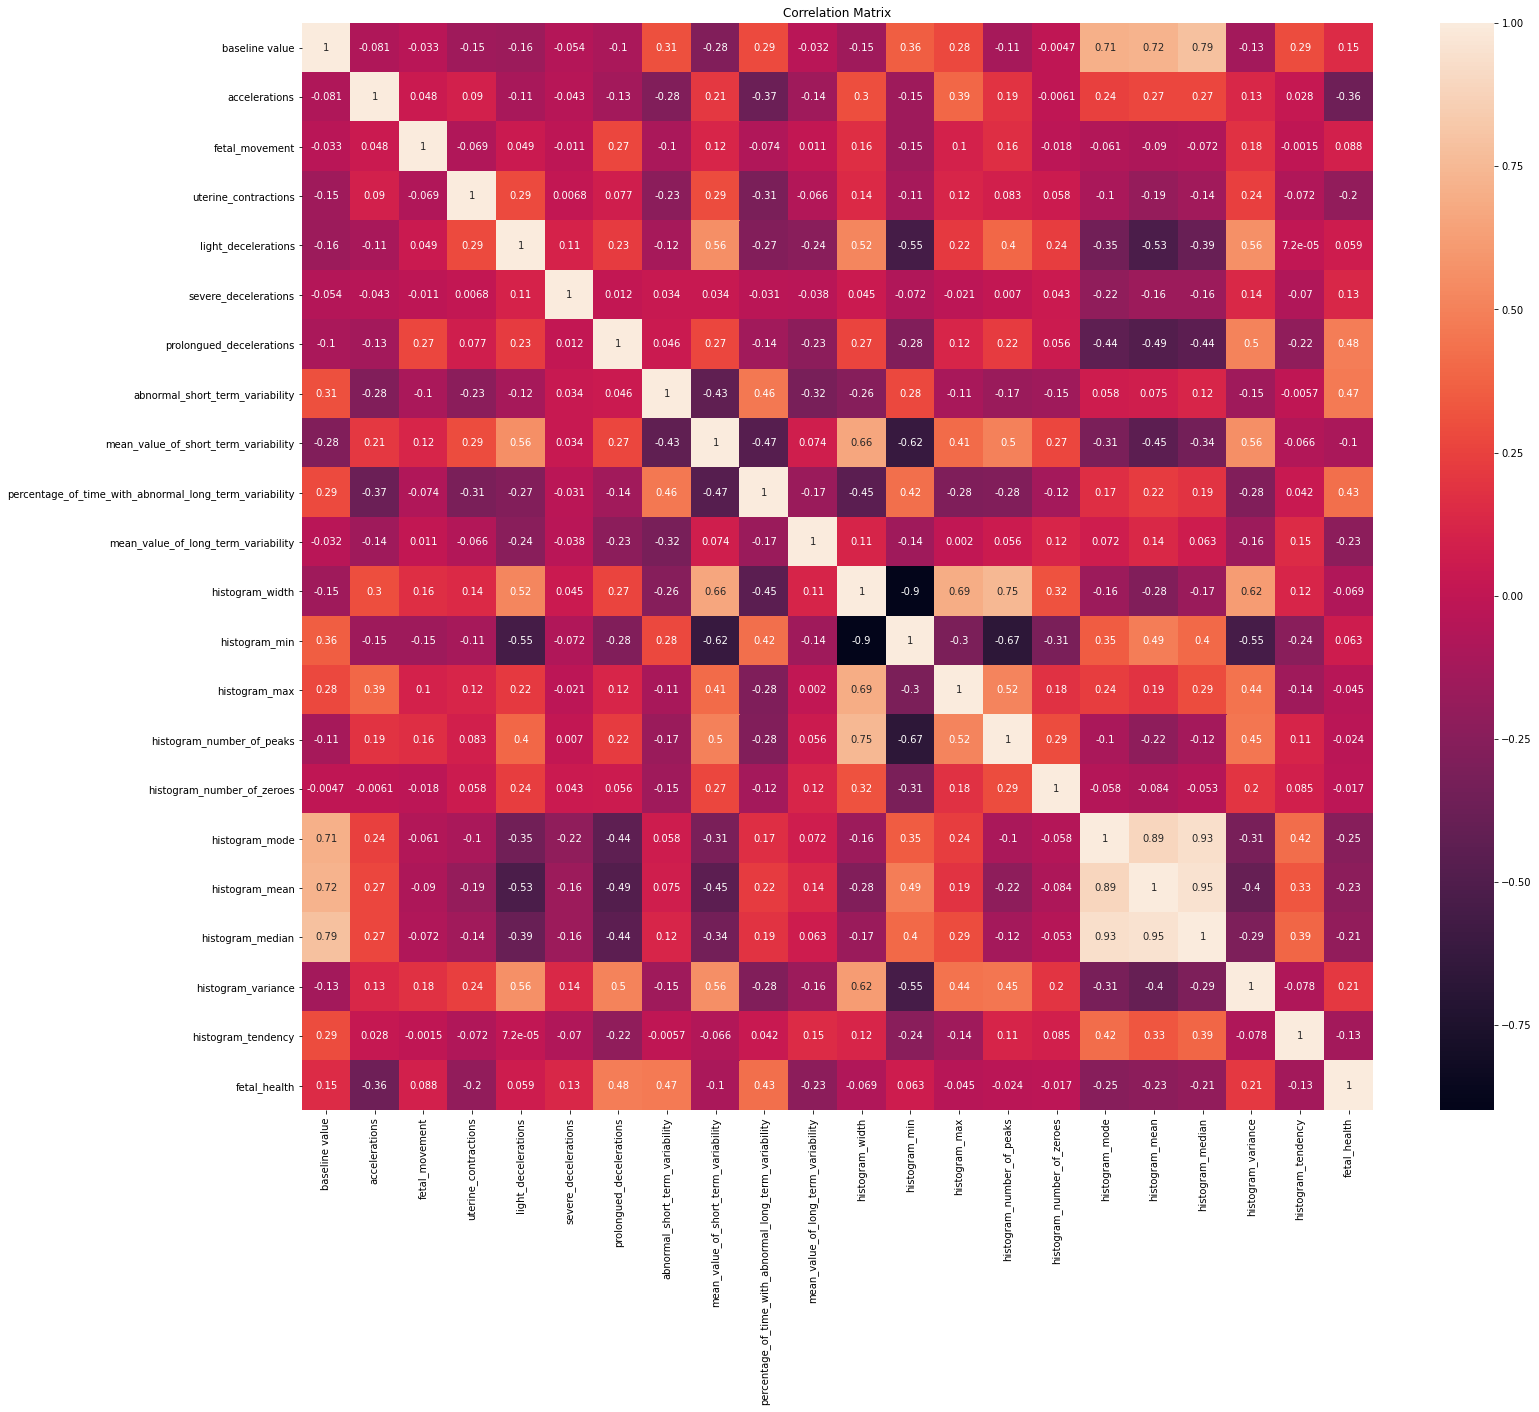

In [11]:
corr = df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

From the above correlation matrix, we can observe that the following features show some correlation with target variable fetal health:

1. accelerations (negative corr)
2. uterine contractions (negative corr)
3. prolonged_decelerations (positive corr)
4. abnormal short term variability (positive corr)
5. percentage of time with abnormal long term variability (positive corr)



## Model Selection

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score

In [27]:
print("There are total "+str(len(df))+" rows in the dataset")

There are total 2126 rows in the dataset


In [28]:
X = df.drop(["fetal_health"],axis=1)
Y = df["fetal_health"]

In [29]:
std_scale = StandardScaler()
X_sc = std_scale.fit_transform(X)

In [30]:
X_train, X_test, y_train,y_test = train_test_split(X_sc, Y, test_size=0.25, random_state=42)
print("There are total "+str(len(X_train))+" rows in training dataset")
print("There are total "+str(len(X_test))+" rows in test dataset")

There are total 1594 rows in training dataset
There are total 532 rows in test dataset


If you remember, in the initial investigation of the data, we found out that we have imbalanced classes. 

To handle the problem of imbalanced classes, we can use oversampling techniques. In oversampling, we populate the minority classes with some synthetic data. 

Let us try some oversampling techniques and judge their performance on the above dataset.

1. SMOTE Technique

In [31]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

2. ADASYN

In [32]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


3. SMOTE + Tomek Links

In [33]:
from imblearn.combine import SMOTETomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


4. SMOTE + ENN

In [34]:
from imblearn.combine import SMOTEENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [35]:
def evaluate_model(clf, X_test, y_test, model_name, oversample_type):
  print('--------------------------------------------')
  print('Model ', model_name)
  print('Data Type ', oversample_type)
  y_pred = clf.predict(X_test)
  f1 = f1_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  precision = precision_score(y_test, y_pred, average='weighted')
  print(classification_report(y_test, y_pred))
  print("F1 Score ", f1)
  print("Recall ", recall)
  print("Precision ", precision)
  return [model_name, oversample_type, f1, recall, precision]

In [36]:
models = {
    'DecisionTrees': DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(random_state=42),
    'LinearSVC':LinearSVC(random_state=0),
    'AdaBoostClassifier':AdaBoostClassifier(random_state=42),
    'SGD':SGDClassifier()
}

In [37]:
oversampled_data = {
    'ACTUAL':[X_train, y_train],
    'SMOTE':[X_train_sm, y_train_sm],
    'ADASYN':[X_train_ada, y_train_ada],
    'SMOTE_TOMEK':[X_train_smtom, y_train_smtom],
    'SMOTE_ENN':[X_train_smenn, y_train_smenn]
}

In [38]:
final_output = []
for model_k, model_clf in models.items():
  for data_type, data in oversampled_data.items():
    model_clf.fit(data[0], data[1])
    final_output.append(evaluate_model(model_clf, X_test, y_test, model_k, data_type))

--------------------------------------------
Model  DecisionTrees
Data Type  ACTUAL
              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       413
         2.0       0.80      0.85      0.83        82
         3.0       0.92      0.95      0.93        37

    accuracy                           0.94       532
   macro avg       0.90      0.92      0.91       532
weighted avg       0.94      0.94      0.94       532

F1 Score  0.9386188989575975
Recall  0.9379699248120301
Precision  0.9395945726899018
--------------------------------------------
Model  DecisionTrees
Data Type  SMOTE
              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       413
         2.0       0.78      0.85      0.81        82
         3.0       0.89      0.92      0.91        37

    accuracy                           0.93       532
   macro avg       0.88      0.91      0.89       532
weighted avg       0.94      0.93      0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------------------------------------
Model  LinearSVC
Data Type  SMOTE
              precision    recall  f1-score   support

         1.0       0.99      0.85      0.91       413
         2.0       0.55      0.79      0.65        82
         3.0       0.54      0.89      0.67        37

    accuracy                           0.84       532
   macro avg       0.69      0.84      0.75       532
weighted avg       0.89      0.84      0.86       532

F1 Score  0.856453967951263
Recall  0.8421052631578947
Precision  0.8922480638230871


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------------------------------------
Model  LinearSVC
Data Type  ADASYN
              precision    recall  f1-score   support

         1.0       0.99      0.82      0.89       413
         2.0       0.45      0.59      0.51        82
         3.0       0.40      0.92      0.56        37

    accuracy                           0.79       532
   macro avg       0.61      0.77      0.65       532
weighted avg       0.86      0.79      0.81       532

F1 Score  0.8113243485588927
Recall  0.7875939849624061
Precision  0.8645050045584658


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------------------------------------
Model  LinearSVC
Data Type  SMOTE_TOMEK
              precision    recall  f1-score   support

         1.0       0.99      0.84      0.91       413
         2.0       0.53      0.77      0.63        82
         3.0       0.52      0.86      0.65        37

    accuracy                           0.83       532
   macro avg       0.68      0.83      0.73       532
weighted avg       0.89      0.83      0.85       532

F1 Score  0.8488026591920187
Recall  0.8327067669172933
Precision  0.8871778653562337


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


--------------------------------------------
Model  LinearSVC
Data Type  SMOTE_ENN
              precision    recall  f1-score   support

         1.0       0.99      0.82      0.90       413
         2.0       0.50      0.80      0.62        82
         3.0       0.56      0.92      0.69        37

    accuracy                           0.82       532
   macro avg       0.69      0.85      0.74       532
weighted avg       0.89      0.82      0.84       532

F1 Score  0.8407104644318539
Recall  0.8233082706766918
Precision  0.8881701431469979
--------------------------------------------
Model  AdaBoostClassifier
Data Type  ACTUAL
              precision    recall  f1-score   support

         1.0       0.93      0.92      0.92       413
         2.0       0.65      0.73      0.69        82
         3.0       0.89      0.84      0.86        37

    accuracy                           0.88       532
   macro avg       0.82      0.83      0.82       532
weighted avg       0.89      0.88  

In [39]:
final_df = pd.DataFrame(final_output, columns=['Model', 'DataType', 'F1', 'Recall', 'Precision'])

In [40]:
final_df.sort_values(by="F1", ascending=False)

,Model,DataType,F1,Recall,Precision
8,RandomForest,SMOTE_TOMEK,0.949907,0.949248,0.950995
5,RandomForest,ACTUAL,0.948361,0.949248,0.948290
7,RandomForest,ADASYN,0.947870,0.947368,0.948598
6,RandomForest,SMOTE,0.946040,0.945489,0.946909
0,DecisionTrees,ACTUAL,0.938619,0.937970,0.939595
1,DecisionTrees,SMOTE,0.935376,0.934211,0.937289
9,RandomForest,SMOTE_ENN,0.911112,0.906015,0.924625
3,DecisionTrees,SMOTE_TOMEK,0.908576,0.906015,0.913633
2,DecisionTrees,ADASYN,0.907025,0.906015,0.908729
4,DecisionTrees,SMOTE_ENN,0.890880,0.885338,0.903952


### Hyperparameter Tuning

In [43]:
param_grid = {
  'criterion':['gini', 'entropy'],
  'max_depth': [10, 20, 40, 80, 100],
  'max_features': ['auto', 'sqrt'],
  'n_estimators': [200, 400, 600, 800, 1000, 2000]
}

In [44]:
rfc = RandomForestClassifier(random_state=42)
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=2)
rfc_cv.fit(X_train_smtom, y_train_smtom)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=200, total=   1.1s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=200, total=   1.1s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=200, total=   1.0s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=200, total=   1.1s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=200 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=200, total=   1.1s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   2.1s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=10, max_features=auto, n_estimators=400, total=   2.1s
[CV] criterion=gini, max_depth=10, max_features=auto, n_estimators=400 
[CV]  criterion=gini, max_depth=10, max_featur

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 58.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [45]:
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 2000}

In [46]:
rf = RandomForestClassifier(n_estimators=2000, criterion='entropy', max_depth=20, max_features='auto')
rf.fit(X_train_smtom, y_train_smtom)
evaluate_model(rf, X_test, y_test, 'RandomForest', 'SMOTE+TOMEK')

--------------------------------------------
Model  RandomForest
Data Type  SMOTE+TOMEK
              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       413
         2.0       0.85      0.89      0.87        82
         3.0       0.90      0.97      0.94        37

    accuracy                           0.95       532
   macro avg       0.91      0.94      0.93       532
weighted avg       0.96      0.95      0.96       532

F1 Score  0.9553939168600822
Recall  0.9548872180451128
Precision  0.956360829901538


['RandomForest',
 'SMOTE+TOMEK',
 0.9553939168600822,
 0.9548872180451128,
 0.956360829901538]

In [47]:
import pickle
filename = 'fetal-health-model.pkl'
pickle.dump(rf, open(filename, 'wb'))